# Recap Session 1 - Python Basics (Sea Level Change, Spring 2021)

#### Step 1: import libraries


In [1]:
# this library contains tools for working with n-dimensional arrays
# and a lot of high-level computing functions.
import numpy as np

# This library is Python's workhorse plotting library
from matplotlib import pyplot as plt

Step 2: useful shortcuts for navigating jupyter notebooks

    While in a cell:
    + [esc]                ==> escape your cell to enter command mode 
    
    While in command mode:
    + [enter]              ==> enter a cell
    + up/down arrows       ==> move up/down cells
    + [b]                  ==> Add a cell under your current cell
    + [a]                  ==> Add a cell above your current cell
    + [c]                  ==> copy current cell
    + [v]                  ==> paste current cell
    + [dd]                 ==> delete the current cell
    + [shift + enter]      ==> run current cell and advance to next cell
    + [command + enter]    ==> run current cell and stay at current cell
    + [m]                  ==> turn current cell into markdown cell
    + [y]                  ==> turn current cell into code cell
    + [r]                  ==> turn current cell into text cell (you won't ever need this)
    + [tab]                ==> indent a line
    + [shift + tab]        ==> unindent a line
    

    

### Vectors or N-dimensional Matrices 


In [2]:
a = np.arange(0, 5, 1)
a

array([0, 1, 2, 3, 4])

Numpy's 'arange' method, the documentation for which is [here](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), returns an array of evenly spaced values within an interval.  
**Notice that Python starts counting from zero.**

Try to predict what would happen if we typed:

    b = np.arange(1, 10, 3)
    

In [3]:
b = np.arange(1, 10, 3)
b

array([1, 4, 7])

We just made a second variable b.  What happened a?  Is it still accessible?

In [4]:
a

array([0, 1, 2, 3, 4])

Yes, a will persist in this session until you modify it, delete it, or restart the kernel.

We can also make an array of random numbers:

In [5]:
c = np.random.random(len(a))
c

array([0.6004576 , 0.84021197, 0.2712065 , 0.15780355, 0.17597692])

What are the properties of c?

In [25]:
print(type(c))
print(c.shape)

<class 'numpy.ndarray'>
(5,)


We can do many operations with arrays:

In [6]:
aa = a * 2
print('a * 2 =', aa)
d = a + 5
print('a + 5 =', d)

a * 2 = [0 2 4 6 8]
a + 5 = [5 6 7 8 9]


But you can't add two arrays of different sizes:

In [7]:
a + b

ValueError: operands could not be broadcast together with shapes (5,) (3,) 

Oh, and if you get lost, you can ask for help.

In [32]:
# help(a)
# a?

# Plotting

At its simplest, matplotlib's plot method can take an array of data and turn it into a figure:


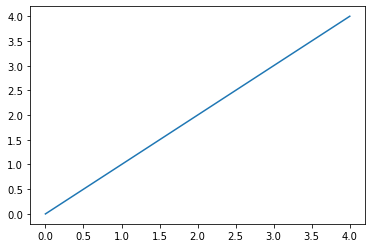

In [8]:
plt.plot(a)

Let's add more to the figure.   How about:

    + data on the y axis
    + color
    + axis labels
    + title
    + more data


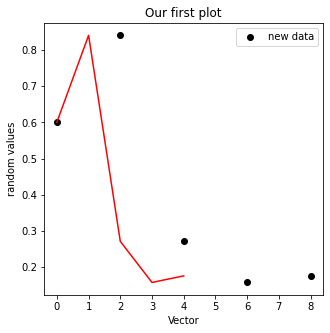

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(a, c, color='r')
ax.set_xlabel('Vector')
ax.set_ylabel('random values')
ax.set_title('Our first plot')

ax.scatter(a*2, c, color='k', label='new data')
ax.legend()

Now that we have this pretty plot, we probably want to save it.

In [11]:
plt.savefig('firstfig.png', dpi=100)

Wait, when we do this it saves an empty figure.  What happened?

__Rule number one of coding: google your question to find the answer__


  
We google ```plt.savefig is blank``` and get this Stack Overflow page:  
https://stackoverflow.com/questions/45584512/plt-savefig-produces-blank-figure-in-python  
The person had exactly the same problem we have.  How did they fix it?

In [ ]:
fig.savefig('firstfig.png', dpi=100)

Hallelujah,  it worked.  

## For loops

In [17]:
x = np.linspace(1, 4, 5)
for i in x:
    print(i)

1.0
1.75
2.5
3.25
4.0


We can do any operation we like in a loop.

In [39]:
for i in x:
    y = i+1
    print(f'y = {y}; x = {i}')

y = 2.0; x = 1.0
y = 2.75; x = 1.75
y = 3.5; x = 2.5
y = 4.25; x = 3.25
y = 5.0; x = 4.0


# Mapping

Now let's plot maps.  

In [86]:
from scipy.interpolate import griddata
import cartopy.feature as cfeature
from matplotlib import colorbar as colorbar

import cmocean
from cartopy import crs as ccrs

First, load data

In [43]:
#ascii file example
etopo = np.loadtxt('etopo_15.txt') #lon, lat, topography

#numpy .npy binary format example
#create file
np.save('etopo_15.npy',etopo)

#It is be quicker to load *.npy file instead of the .txt file
#load file
#etopo = np.load('etopo_15.npy')

What does etopo look like?

In [48]:
etopo

array([[ 1.2000e-01, -8.9880e+01,  1.8000e+01],
       [ 1.2000e-01, -8.9620e+01, -7.7000e+01],
       [ 1.2000e-01, -8.9380e+01, -1.9000e+02],
       ...,
       [ 3.5988e+02,  8.9380e+01, -4.1600e+03],
       [ 3.5988e+02,  8.9620e+01, -4.1510e+03],
       [ 3.5988e+02,  8.9880e+01, -4.1630e+03]])

Great.  Now we prepare data to be plotted.  
We need to create 3 2-D matrices in which each element represents the lat, lon, or topography at the given point.

In [60]:
if(True):
    ##This is one way ... better for irregularly space data
    print('linear interpolation ...')
    lon = np.arange(etopo[:,0].min(),etopo[:,0].max()+1,0.5)
    lat = np.arange(etopo[:,1].min(),etopo[:,1].max()+1,0.5)
    lon2,lat2 = np.meshgrid(lon,lat)
    topo2 = griddata((etopo[:,0],etopo[:,1]),etopo[:,2],(lon2, lat2), method='linear')

if(False):
    ##Another way is to reshape the columns vectors of etopo into 2D arrays
    ##This only works if the data is already in a regular grid
    print('reshape input data to 2D grids')
    num1 = np.unique(etopo[:,0]).size
    num2 = np.unique(etopo[:,1]).size

    lon2 = np.reshape(etopo[:,0],(num1,num2)).T
    lat2 = np.reshape(etopo[:,1],(num1,num2)).T
    #Are these the matrices you are looking for?
    #print(lon2)
    #print(lat2)
    topo2 = np.reshape(etopo[:,2],(num1,num2)).T

linear interpolation ...


Sanity check: did it work?

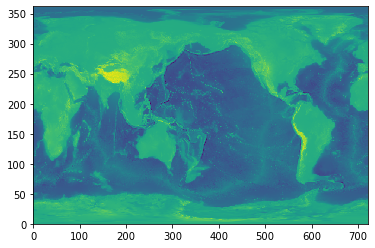

In [45]:
plt.pcolormesh(topo2)

Now we want to plot it with latitudes and longitudes

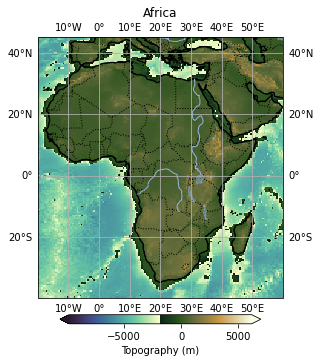

In [93]:
#################### Geographic plot

#Sets the figure window size
fig = plt.figure(figsize=(12,6))
#Create basemap with crude resolution coastlines

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# add gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add data
pc = ax.pcolormesh(lon,lat,topo2,cmap = cmocean.cm.topo, transform=ccrs.PlateCarree())

#Set colormap parameters
cax,kw = colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.3)
cb=fig.colorbar(pc,cax=cax,extend='both',**kw)
cb.set_label('Topography (m)',size=10)

# Add title
ax.set_title('etopo bedrock');

# ax.clim(-6000,6000)
# cb = plt.colorbar(ax)#
# cb.set_label(label='topography/bathymetry (m)',size=15,weight='bold')

# m1 = Basemap(projection='robin',lon_0=0,resolution='c')
# m1.drawcoastlines()

#Add lat/lon lines and labels
# m1.drawparallels(np.arange(-90.,120.,30.), labels=[True,False,False,False])
# m1.drawmeridians(np.arange(0.,360.,60.), labels=[False,False,False,True])

#Add data
# m1.pcolormesh(lon2,lat2,topo2,shading='gouraud',cmap = cmocean.cm.topo,latlon=True)

#Set colormap parameters
# plt.clim(-6000,6000)
# cb = plt.colorbar().set_label(label='topography/bathymetry (m)',size=15,weight='bold')

#Add title
# plt.title('etopo bedrock')

#Show plot
# plt.show()
